In [1]:
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


---

# n_epoch=100

In [2]:
tf.reset_default_graph()

image_dim = 784 # 28*28 pixels
z_dim = 20 # Noise data points
total_samples = len(X)


# Generator
def generator(x, reuse=False):
    with tf.variable_scope('Generator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, image_dim, activation='tanh')
        return x


# Discriminator
def discriminator(x, reuse=False):
    with tf.variable_scope('Discriminator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, 1, activation='sigmoid')
        return x

# Build Networks
gen_input = tflearn.input_data(shape=[None, z_dim], name='input_noise')
disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample, reuse=True)

# Define Loss
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))
gen_loss = -tf.reduce_mean(tf.log(disc_fake))

# Build Training Ops for both Generator and Discriminator.
# Each network optimization should only update its own variable, thus we need
# to retrieve each network variables (with get_layer_variables_by_scope) and set
# 'placeholder=None' because we do not need to feed any target.
gen_optimizer = tflearn.optimizers.adam(learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08)
disc_optimizer = tflearn.optimizers.adam(learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08)
gen_vars = tflearn.get_layer_variables_by_scope('Generator')
gen_model = tflearn.regression(gen_sample, placeholder=None, optimizer=gen_optimizer,
                               loss=gen_loss, trainable_vars=gen_vars,
                               batch_size=64, name='target_gen', op_name='GEN')
disc_vars = tflearn.get_layer_variables_by_scope('Discriminator')
disc_model = tflearn.regression(disc_real, placeholder=None, optimizer=disc_optimizer,
                                loss=disc_loss, trainable_vars=disc_vars,
                                batch_size=64, name='target_disc', op_name='DISC')
# Define GAN model, that output the generated images.
gan = tflearn.DNN(gen_model, tensorboard_dir='/home/hadoop/Documents/Neutrino/tensorboard_logs')

# Training
# Generate noise to feed to the generator
z = np.random.uniform(-1., 1., size=[total_samples, z_dim])
# Start training, feed both noise and real images.
gan.fit(X_inputs={gen_input: z, disc_input: X},
        Y_targets=None,
        run_id='n_epoch=100',
        n_epoch=100)

Training Step: 85999  | total loss: 2.67971 | time: 4.045s
| GEN | epoch: 100 | loss: 1.87941 -- iter: 54976/55000
| DISC | epoch: 100 | loss: 0.80031 -- iter: 54976/55000
Training Step: 86000  | total loss: 2.68306 | time: 4.050s
| GEN | epoch: 100 | loss: 1.88214 -- iter: 55000/55000
| DISC | epoch: 100 | loss: 0.80093 -- iter: 55000/55000
--


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

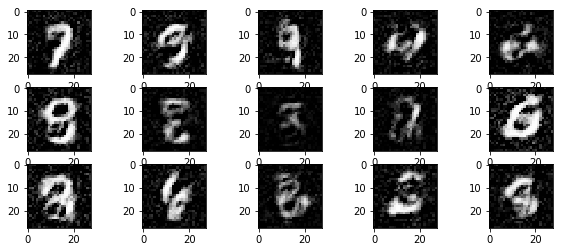

In [3]:
# Generate images from noise, using the generator network.
f, a = plt.subplots(3, 5, figsize=(10, 4))
for i in range(5):
    for j in range(3):
        # Noise input.
        z = np.random.uniform(-1., 1., size=[1, z_dim])
        # Generate image from noise. Extend to 3 channels for matplot figure.
        temp = [[ii, ii, ii] for ii in list(gan.predict([z])[0])]
        a[j][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()

---
# n_epoch=30

In [4]:
tf.reset_default_graph()

image_dim = 784 # 28*28 pixels
z_dim = 20 # Noise data points
total_samples = len(X)


# Generator
def generator(x, reuse=False):
    with tf.variable_scope('Generator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, image_dim, activation='tanh')
        return x


# Discriminator
def discriminator(x, reuse=False):
    with tf.variable_scope('Discriminator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, 1, activation='sigmoid')
        return x

# Build Networks
gen_input = tflearn.input_data(shape=[None, z_dim], name='input_noise')
disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample, reuse=True)

# Define Loss
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))
gen_loss = -tf.reduce_mean(tf.log(disc_fake))

# Build Training Ops for both Generator and Discriminator.
# Each network optimization should only update its own variable, thus we need
# to retrieve each network variables (with get_layer_variables_by_scope) and set
# 'placeholder=None' because we do not need to feed any target.
gen_vars = tflearn.get_layer_variables_by_scope('Generator')
gen_model = tflearn.regression(gen_sample, placeholder=None, optimizer='adam', learning_rate=0.0001,
                               loss=gen_loss, trainable_vars=gen_vars,
                               batch_size=64, name='target_gen', op_name='GEN')
disc_vars = tflearn.get_layer_variables_by_scope('Discriminator')
disc_model = tflearn.regression(disc_real, placeholder=None, optimizer='adam', learning_rate=0.0001,
                                loss=disc_loss, trainable_vars=disc_vars,
                                batch_size=64, name='target_disc', op_name='DISC')
# Define GAN model, that output the generated images.
gan = tflearn.DNN(gen_model, tensorboard_dir='/home/hadoop/Documents/Neutrino/tensorboard_logs')

# Training
# Generate noise to feed to the generator
z = np.random.uniform(-1., 1., size=[total_samples, z_dim])
# Start training, feed both noise and real images.
gan.fit(X_inputs={gen_input: z, disc_input: X},
        Y_targets=None,
        run_id='n_epoch=30',
        n_epoch=30)

Training Step: 25799  | total loss: 2.48029 | time: 3.975s
| GEN | epoch: 030 | loss: 1.79897 -- iter: 54976/55000
| DISC | epoch: 030 | loss: 0.68132 -- iter: 54976/55000
Training Step: 25800  | total loss: 2.48599 | time: 3.979s
| GEN | epoch: 030 | loss: 1.80792 -- iter: 55000/55000
| DISC | epoch: 030 | loss: 0.67807 -- iter: 55000/55000
--


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

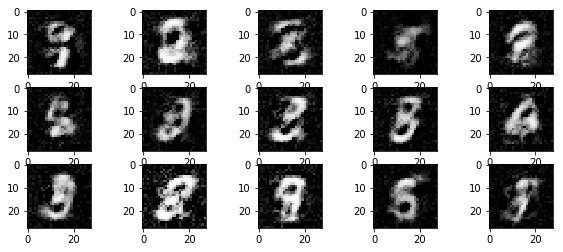

In [5]:
# Generate images from noise, using the generator network.
f, a = plt.subplots(3, 5, figsize=(10, 4))
for i in range(5):
    for j in range(3):
        # Noise input.
        z = np.random.uniform(-1., 1., size=[1, z_dim])
        # Generate image from noise. Extend to 3 channels for matplot figure.
        temp = [[ii, ii, ii] for ii in list(gan.predict([z])[0])]
        a[j][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()

---

# n_epoch=10

In [6]:
tf.reset_default_graph()

image_dim = 784 # 28*28 pixels
z_dim = 20 # Noise data points
total_samples = len(X)


# Generator
def generator(x, reuse=False):
    with tf.variable_scope('Generator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, image_dim, activation='tanh')
        return x


# Discriminator
def discriminator(x, reuse=False):
    with tf.variable_scope('Discriminator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, 1, activation='sigmoid')
        return x

# Build Networks
gen_input = tflearn.input_data(shape=[None, z_dim], name='input_noise')
disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample, reuse=True)

# Define Loss
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))
gen_loss = -tf.reduce_mean(tf.log(disc_fake))

# Build Training Ops for both Generator and Discriminator.
# Each network optimization should only update its own variable, thus we need
# to retrieve each network variables (with get_layer_variables_by_scope) and set
# 'placeholder=None' because we do not need to feed any target.
gen_vars = tflearn.get_layer_variables_by_scope('Generator')
gen_model = tflearn.regression(gen_sample, placeholder=None, optimizer='adam', learning_rate=0.0001,
                               loss=gen_loss, trainable_vars=gen_vars,
                               batch_size=64, name='target_gen', op_name='GEN')
disc_vars = tflearn.get_layer_variables_by_scope('Discriminator')
disc_model = tflearn.regression(disc_real, placeholder=None, optimizer='adam', learning_rate=0.0001,
                                loss=disc_loss, trainable_vars=disc_vars,
                                batch_size=64, name='target_disc', op_name='DISC')
# Define GAN model, that output the generated images.
gan = tflearn.DNN(gen_model, tensorboard_dir='/home/hadoop/Documents/Neutrino/tensorboard_logs')

# Training
# Generate noise to feed to the generator
z = np.random.uniform(-1., 1., size=[total_samples, z_dim])
# Start training, feed both noise and real images.
gan.fit(X_inputs={gen_input: z, disc_input: X},
        Y_targets=None,
        run_id='n_epoch=10',
        n_epoch=10)

Training Step: 8599  | total loss: 2.04539 | time: 3.854s
| GEN | epoch: 010 | loss: 1.25451 -- iter: 54976/55000
| DISC | epoch: 010 | loss: 0.79088 -- iter: 54976/55000
Training Step: 8600  | total loss: 2.05174 | time: 3.858s
| GEN | epoch: 010 | loss: 1.25415 -- iter: 55000/55000
| DISC | epoch: 010 | loss: 0.79759 -- iter: 55000/55000
--


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

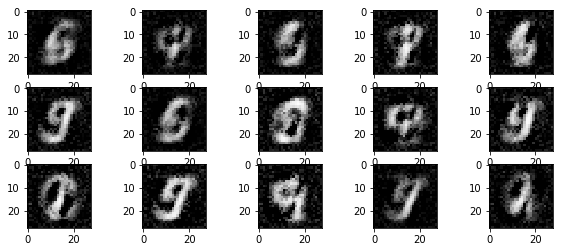

In [7]:
# Generate images from noise, using the generator network.
f, a = plt.subplots(3, 5, figsize=(10, 4))
for i in range(5):
    for j in range(3):
        # Noise input.
        z = np.random.uniform(-1., 1., size=[1, z_dim])
        # Generate image from noise. Extend to 3 channels for matplot figure.
        temp = [[ii, ii, ii] for ii in list(gan.predict([z])[0])]
        a[j][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()

---

# z_dim = 100

In [9]:
tf.reset_default_graph()

image_dim = 784 # 28*28 pixels
z_dim = 100 # Noise data points
total_samples = len(X)


# Generator
def generator(x, reuse=False):
    with tf.variable_scope('Generator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, image_dim, activation='tanh')
        return x


# Discriminator
def discriminator(x, reuse=False):
    with tf.variable_scope('Discriminator', reuse=reuse):
        x = tflearn.fully_connected(x, 256, activation='relu')
        x = tflearn.fully_connected(x, 1, activation='sigmoid')
        return x

# Build Networks
gen_input = tflearn.input_data(shape=[None, z_dim], name='input_noise')
disc_input = tflearn.input_data(shape=[None, 784], name='disc_input')

gen_sample = generator(gen_input)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample, reuse=True)

# Define Loss
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))
gen_loss = -tf.reduce_mean(tf.log(disc_fake))

# Build Training Ops for both Generator and Discriminator.
# Each network optimization should only update its own variable, thus we need
# to retrieve each network variables (with get_layer_variables_by_scope) and set
# 'placeholder=None' because we do not need to feed any target.
gen_vars = tflearn.get_layer_variables_by_scope('Generator')
gen_model = tflearn.regression(gen_sample, placeholder=None, optimizer='adam', learning_rate=0.0001,
                               loss=gen_loss, trainable_vars=gen_vars,
                               batch_size=64, name='target_gen', op_name='GEN')
disc_vars = tflearn.get_layer_variables_by_scope('Discriminator')
disc_model = tflearn.regression(disc_real, placeholder=None, optimizer='adam', learning_rate=0.0001,
                                loss=disc_loss, trainable_vars=disc_vars,
                                batch_size=64, name='target_disc', op_name='DISC')
# Define GAN model, that output the generated images.
gan = tflearn.DNN(gen_model, tensorboard_dir='/home/hadoop/Documents/Neutrino/tensorboard_logs')

# Training
# Generate noise to feed to the generator
z = np.random.uniform(-1., 1., size=[total_samples, z_dim])
# Start training, feed both noise and real images.
gan.fit(X_inputs={gen_input: z, disc_input: X},
        Y_targets=None,
        run_id='z_dim=100',
        n_epoch=100)

Training Step: 85999  | total loss: 2.94732 | time: 4.092s
| GEN | epoch: 100 | loss: 2.29223 -- iter: 54976/55000
| DISC | epoch: 100 | loss: 0.65509 -- iter: 54976/55000
Training Step: 86000  | total loss: 2.93836 | time: 4.097s
| GEN | epoch: 100 | loss: 2.29132 -- iter: 55000/55000
| DISC | epoch: 100 | loss: 0.64704 -- iter: 55000/55000
--


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

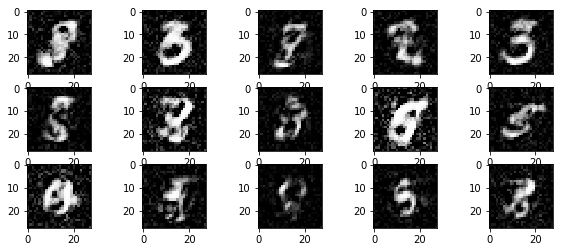

In [10]:
# Generate images from noise, using the generator network.
f, a = plt.subplots(3, 5, figsize=(10, 4))
for i in range(5):
    for j in range(3):
        # Noise input.
        z = np.random.uniform(-1., 1., size=[1, z_dim])
        # Generate image from noise. Extend to 3 channels for matplot figure.
        temp = [[ii, ii, ii] for ii in list(gan.predict([z])[0])]
        a[j][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()